In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
final_data=pd.read_csv('/content/final_dataset_ready_5.csv')
final_data.head()

,TransactionAmount,customer_rating,engagement_score,CustomerEngagementScore,TransactionAmount_MA,Month,MonthlyTotalSpent,negative,neutral,positive
0,6.008988,2.3,70.0,0.421121,0.898155,1,0.039511,1.0,0.0,0.0
1,5.806114,4.2,52.0,0.089961,0.799748,1,0.266104,0.0,0.0,1.0
2,5.806114,4.2,0.0,NaN,0.799748,1,0.266104,0.0,0.0,0.0
3,5.806114,4.2,0.0,NaN,0.799748,1,0.266104,0.0,0.0,0.0
4,5.806114,4.2,86.0,0.731421,0.799748,1,0.266104,1.0,0.0,0.0


In [6]:
# Ensure column names are stripped of whitespace
final_data.columns = final_data.columns.str.strip()

In [8]:
#Define Features (X) and Target (y)
if 'TransactionAmount' not in final_data.columns:
    raise ValueError("TransactionAmount column is missing. It is required as the target variable.")

X = final_data.drop(columns=['TransactionAmount'], errors='ignore')
y = final_data['TransactionAmount']

In [24]:
#Handle Missing Values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)
final_data['CustomerEngagementScore'].fillna(0, inplace=True)

In [25]:
final_data.isnull().sum()

,0
TransactionAmount,0
customer_rating,0
engagement_score,0
CustomerEngagementScore,0
TransactionAmount_MA,0
Month,0
MonthlyTotalSpent,0
negative,0
neutral,0
positive,0


In [26]:
#Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
#Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
#Make Predictions
y_pred = model.predict(X_test)

In [31]:
#Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.03
R-squared Score (R2): 0.85


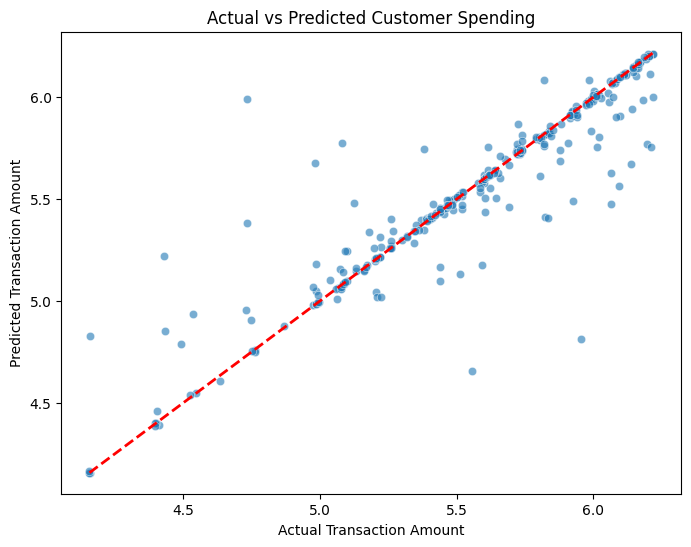

In [32]:
# Plot Actual vs. Predicted Values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Transaction Amount")
plt.ylabel("Predicted Transaction Amount")
plt.title("Actual vs Predicted Customer Spending")
plt.show()